In [73]:
import numpy as np
import os
import pickle as p
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import networkx as nx
import plotly.graph_objs as go

In [55]:
path_1 = "/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/simu_graph/0/"
folder = "/graphs/"
#path = "/home/rohit/PhD_Work/stage_nathan/data/simu_graph/noise_50,outliers_20/0/graphs/"
#directory = os.listdir("/home/rohit/PhD_Work/stage_nathan/data/simu_graph/noise_50,outliers_20/0/graphs")

In [56]:
def mean_edge_len(G):
    
    all_geo = [z['geodesic_distance'] for x,y,z in list(G.edges.data())]
    mean_geo = np.array(all_geo).mean()
    std = np.std(all_geo)
    
    return mean_geo,std,all_geo

In [60]:
split_str = os.listdir(path_1)[2].split('_') # split folder name to extract noise param
#int(split_str[1].split(',')[])

In [59]:
os.listdir(path_1)

['reference_0.gpickle',
 'noise_1000,outliers_4',
 'noise_1000,outliers_8',
 'noise_1000,outliers_12',
 'noise_1000,outliers_16',
 'noise_1000,outliers_0']

In [65]:
def mean_edge_len_vs_noise(path):
    data_folder = [name for name in os.listdir(path) if os.path.isdir(path+name)] # list the folders containing all graphs
    
    mean_geo = []
    noise_params = []
    mean_std = []
    all_geo_arr = []
    
    for dr in data_folder:
        geo_dis = []
        std_dist = []
        geo_dist_arr = []
        
        for graph in os.listdir(path+"/"+dr+folder):
            
            G = nx.read_gpickle(path+"/"+dr+folder+"/"+graph) #read the graphs
            
            dist,std,all_geo = mean_edge_len(G)
            geo_dis.append(dist) # mean geodesic distance of graph samples per parameters
            std_dist.append(std) # standard deviation of graph samples per parameters
            geo_dist_arr.append(np.array(all_geo))
                
        all_geo_arr.append(np.mean(np.array(geo_dist_arr),0))
        mean_geo.append(np.mean(geo_dis)) # mean of mean geodesic distance
        mean_std.append(np.mean(std_dist)) # mean standard deviation
        
        split_str = dr.split('_') # split folder name to extract noise param
        noise_params.append(int(split_str[-1].split(',')[0]))
        
        
    return mean_geo,noise_params,mean_std,all_geo_arr

In [66]:
mean_geo,noise_params,mean_std,all_geo_arr = mean_edge_len_vs_noise(path_1)

In [67]:
data_is = {'noise_params':noise_params,'mean_geo':mean_geo,'mean_std':mean_std}
df = pd.DataFrame(data_is, columns=['noise_params','mean_geo','mean_std'])

In [68]:
df = df.sort_values(by=['noise_params'])

In [69]:
noise_params = df['noise_params'].values.tolist()
mean_geo = df['mean_geo'].values.tolist()
mean_std = df['mean_std'].values.tolist()

In [70]:
# plt.plot(noise_params,mean_geo,'-o',c='red')
# plt.title("Mean_edge_length vs Noise")
# plt.xlabel('Noise')
# plt.ylabel('Mean edge length')

In [76]:
mean_edge_len

<function __main__.mean_edge_len(G)>

Text(0, 0.5, 'Mean edge length')

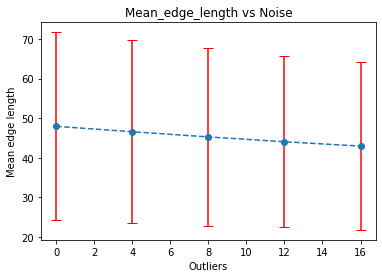

In [72]:
plt.errorbar(noise_params,mean_geo,mean_std, linestyle='--', marker='o',ecolor='r',capsize=5)
plt.title("Mean_edge_length vs Noise")
plt.xlabel('Outliers')
plt.ylabel('Mean edge length')

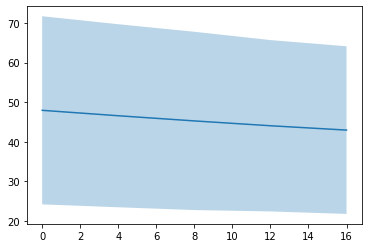

In [90]:
y_min = np.array(mean_geo) - mean_std
y_max = np.array(mean_geo) + mean_std
plt.plot(noise_params,mean_geo)
plt.fill_between(noise_params,y_max,y_min,alpha=0.3)

In [89]:
# y_upper = np.array(mean_geo) + mean_std
# y_lower = np.array(mean_geo) - mean_std

# fig = go.Figure([
#     go.Scatter(
#         x=noise_params,
#         y=mean_geo,
#         line=dict(color='rgb(0,100,80)'),
#         mode='lines'
#     ),
#     go.Scatter(
#         x=noise_params+noise_params[::-1], # x, then x reversed
#         y=y_upper+y_lower[::-1], # upper, then lower reversed
#         fill='toself',
#         fillcolor='rgba(0,100,80,0.2)',
#         line=dict(color='rgba(255,255,255,0)'),
#         hoverinfo="skip",
#         showlegend=False
#     )
# ])
# fig.show()

In [12]:
#sns.distplot(all_geo_arr, hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3})

Text(0, 0.5, 'Density')

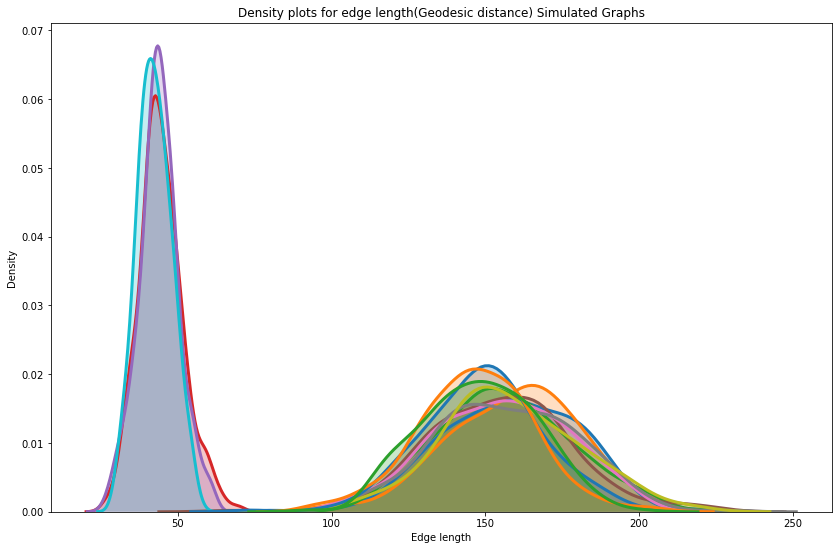

In [14]:
plt.figure(figsize=(14,9))
for arr in all_geo_arr:
    sns.distplot(arr, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
plt.title("Density plots for edge length(Geodesic distance) Simulated Graphs")
plt.xlabel('Edge length')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

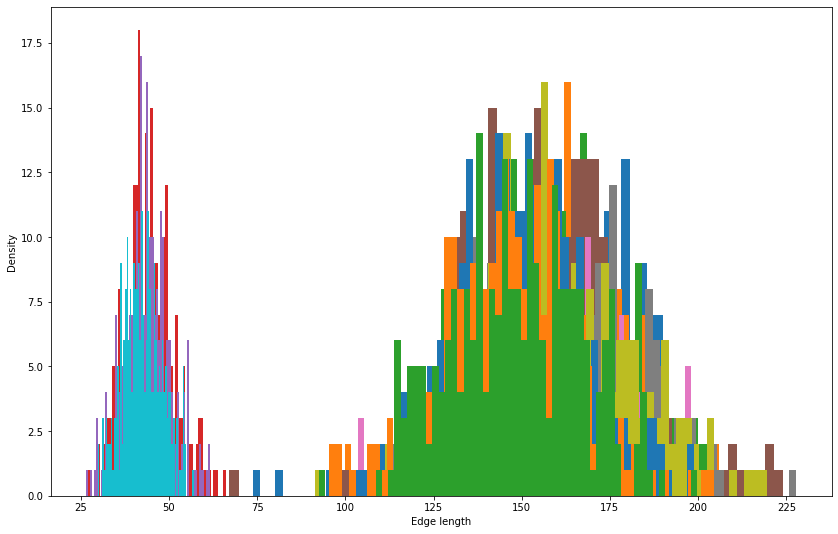

In [15]:
plt.figure(figsize=(14,9))
for arr in all_geo_arr:
    plt.hist(arr, bins = 60)
plt.xlabel('Edge length')
plt.ylabel('Density')

In [14]:
#a.append(a)